# ANÁLISIS EXPLORATORIO DE DATOS (EDA)
## DATASET: **Hechos**

## Índice de contenido

1. **Ingesta de datos**

2. **Inspección preliminar**

3. **Duplicados**

4. **Valores faltantes**

5. **Outliers**

6. **Gráficos (variables cuantitativas)**

7. **Gráficos (variables cualitativas)**

8. **Creación CSV**


## 1. Ingesta de datos

### 1.1 Importamos librerías

In [359]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image

<p>



</p>

### 1.2 Leemos los datasets

Importamos el dataset en formato .xlsx

In [360]:
df = pd.read_excel('data/homicidios.xlsx')
comunas = pd.read_excel('data/comunas.xlsx')

<p>



</p>

## 2. Inspección preliminar del dataset

**MUESTRA**

Comenzamos con una rapida muestra de los primeros datos del dataset

In [361]:
df.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,Comuna,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,1900-01-02 04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47534,-34.68757,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,1900-01-02 01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,1900-01-02 07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,NaN,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.465039,-34.68093,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,1900-01-02 05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.387183,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


<p>



</p>

**COLUMNAS Y FILAS**

Mediante el uso de **.shape**, vemos la cantidad de columnnas y de registros respectivamente

In [362]:
df.shape

(696, 21)

<p>



</p>

**NOMBRES DE COLUMNAS**

A continuación, bservamos los nombres de las columnas para identificar inconsistencias.

In [363]:
df.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'Comuna', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

Si bien los nombres son claros y representan el dato, mejoraremos la forma en la que estan escritas para que sena mas legibles.

In [364]:
# Modificamos la inicial a mayusculas solamente.
df.columns = [x.capitalize() for x in df.columns]

# Reemplazamos guión por espacio.
df.columns = df.columns.str.replace("_", " ")

df= df.rename(columns={"N victimas": "Num víctimas",
                        "Aaaa": "Año",
                        "Mm":"Mes",
                        "Dd": "Día",
                        "Hora": "Hora total",
                        "Hh": "Hora"}) 

<p>



</p>

**TIPOS DE DATOS Y VALORES FALTANTES**

Mediante el uso de **.info()** observamos tipos de datos de cada columna y si poseen nulos.

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Id                     696 non-null    object        
 1   Num víctimas           696 non-null    int64         
 2   Fecha                  696 non-null    datetime64[ns]
 3   Año                    696 non-null    int64         
 4   Mes                    696 non-null    int64         
 5   Día                    696 non-null    int64         
 6   Hora total             691 non-null    object        
 7   Hora                   696 non-null    object        
 8   Lugar del hecho        696 non-null    object        
 9   Tipo de calle          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

<p>



</p>

Tenemos 4 columnas con datos faltantes. Estas son **Calle**, **Altura**, **Cruce** y **Dirección Normalizada**.

El resto de las columnas, en primera instancia, se encuentran completas.

<p>



</p>

Con respecto a los tipos de datos, encontramos iconsistencias en la columna **'HH'** la cual esta siendo reconocida como object o str cuando deberia ser un numero entero. Esta columna identifica la hora en la que ocurrio el siniestro, sin tener en cuenta los minutos con un valor valido entre 0 y 23. 

Para identificar el problema, observamos los valores unicos de la columna. 

In [366]:
df["Hora"].unique()

array([4, 1, 7, 0, 5, 18, 19, 15, 11, 22, 16, 9, 23, 6, 10, 17, 12, 8, 20,
       21, 14, 3, 2, 13, 'SD'], dtype=object)

<p>



</p>

Observamos que hay un valor que contiene la palabra 'SD', utlizado para identificar a un sieniestro del cual no se tiene información sobre la hora en el que sucedió. 

Para este caso, lo que haremos será imputar el valor promedio de la columna HH al resgistro que tiene valor 'SD'. Dado que es un solo valor, no debería influir en el resultado de los análisis y consideramos que es mejor mantener el registro ya que puede agregar valor. 

Para ello, buscamos el valor promedio de esa columna y lo imputamos.

In [367]:
# Creamos un dataframe nuevo que contiene la copia del original
df_prueba = df.copy()

# Eliminamos el registro que contiene la palabra 'SD'
df_prueba = df_prueba[df_prueba['Hora'] != 'SD']

In [368]:
# Calculamos el promedio de la columna 'HH'
round(df_prueba['Hora'].mean(),0)

12.0

<p>



</p>

El valor promedio de esta columna nos esta indicando que a las 12 del mediodía, es cuando mas accidentes ocurren. 

Con este valor, reemplazaremos el valor 'SD' en el dataframe original. 

In [369]:
df['Hora'] = df['Hora'].replace('SD', 12)

In [370]:
df['Hora'].unique()

array([ 4,  1,  7,  0,  5, 18, 19, 15, 11, 22, 16,  9, 23,  6, 10, 17, 12,
        8, 20, 21, 14,  3,  2, 13])

<p>



</p>

Observamos que ya no tenemos ese valor 'SD' por lo que procedemos a convertir la columna a tipo entero.

In [371]:
df['Hora'] = df['Hora'].astype(int)

<p>



</p>

**CRUCE DE DATOS CON NUEVO DATASET**

En la columna 'Comuna' tenemos una numeracion del 1 al 15. Esta numeración identifica a cada una de las divisiones comunales de la ciudad autónoma de Buenos Aires. 

Para agregar valor al dataset, agregaremos la descripción de cada una de las comunas, con los **Barrios** que la conforman. 

Para eso utilizaremos el dataset **'comunas'** importado en el paso 1. Este dataset fue descargado del siguiente sitio web: https://buenosaires.gob.ar/comunas

Para ello haremos uso de la herramienta **.merge** y lo que haremos es agregar una columna al final con el nombre ***Barrios***.

In [372]:
df = df.merge(comunas, on='Comuna', how='left')

In [373]:
df.columns

Index(['Id', 'Num víctimas', 'Fecha', 'Año', 'Mes', 'Día', 'Hora total',
       'Hora', 'Lugar del hecho', 'Tipo de calle', 'Calle', 'Altura', 'Cruce',
       'Dirección normalizada', 'Comuna', 'Xy (caba)', 'Pos x', 'Pos y',
       'Participantes', 'Victima', 'Acusado', 'BARRIOS'],
      dtype='object')

Vemos que al final tenemos la nueva columna ***'Barrios'***, lo que nos permitirá ser mas precisos con los análisis posteriores.

Renombramos la columna

In [374]:
df.rename(columns={'BARRIOS': 'Barrios'}, inplace=True)

<p>



</p>

**COLUMNA DÍA SEMANA**

Agregamos al final del data set una columna que nos indique que dia de la semana ocurrio el accidente.

Esta columna suma valor en caso que deseemos ver en que día de la semana es mas frecuente que ocurran siniestros viales.

In [375]:
# Creamos la columna. Para cada dia nos identifica que dí de la semana es. 
df['Día semana'] = df['Fecha'].dt.strftime('%A')

# Creamos diccionario para reemplzar valores ya que la funcion nos devuelve valores en inglés.
dic = {
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo',
    'Thursday': 'Jueves',
    'Monday': 'Lunes',
    'Wednesday': 'Miércoles',
    'Tuesday': 'Martes'
}

#Aplicamos el diccionario. 
df['Día semana'] = df['Día semana'].replace(dic)

<p>



</p>

## 3. Duplicados


A continuación se evidencia la existencia o inexistencia de registros duplicados en el dataset. 

Como podemos observar, no existen duplicados. 

Esto es de suma importancia, ya que un dataset con valores duplicados puede sesgar el resultado de los análisis posteriores. 

In [376]:
df.duplicated().sum()

0

## 4. Valores faltantes

En este apartado se buscan los valores faltantes de cada columna y se analiza que hacer con ellos. 

Como se menciono anteriormente, existen 4 columnas con valores faltantes, de las cuales dos presentan una cantidad considerable (Altura y Cruce)

In [377]:
df.isnull().sum()

Id                         0
Num víctimas               0
Fecha                      0
Año                        0
Mes                        0
Día                        0
Hora total                 5
Hora                       0
Lugar del hecho            0
Tipo de calle              0
Calle                      1
Altura                   567
Cruce                    171
Dirección normalizada      8
Comuna                     0
Xy (caba)                  0
Pos x                      0
Pos y                      0
Participantes              0
Victima                    0
Acusado                    0
Barrios                    2
Día semana                 0
dtype: int64

<p>



</p>

Columna **Altura**: la misma presenta el *81,5%* de datos faltantes. 

Tomando esto como base, procedemos a eliminar la columna. No se puede imputar valores a esa columna porque no sería información correcta o apropiada para el caso. 



In [378]:
df.drop(columns='Altura',inplace=True)

<p>



</p>

Columna **Cruce**: la misma presenta el *24,6%* de datos faltantes. 

Si observamos detenidamente la columna 'Direccion Normalizada' y la columna 'LUGAR_DEL_HECHO', observamos que tenemos la informacion completa del lugar del hecho (tanto la calle como el cruce).

Sabiendo esto y entiendo que no perdemos información, eliminamos la columna cruce.



In [379]:
df.drop(columns='Cruce',inplace=True)

<p>



</p>

Para las columnas **Calle** y **Direccion Normalizada** no tomamos acciones porque son pocos los valores faltantes. Decidimos mantener las columnas en caso de que podamos utilizarlas en la creación de KPI's y el Dashboard. 

<p>



</p>

## 5. Outliers

En esta sección identificaremos los **outliers** del dataset, es decir, aquellos valores que ***“escapan al rango en donde se concentran la mayoría de muestras"***

Previo a la identificación de estos valores, definiremos las columnas que queremos analizar. 

En este caso seran: Num víctimas, Año, Mes, Día, Hora y Comuna

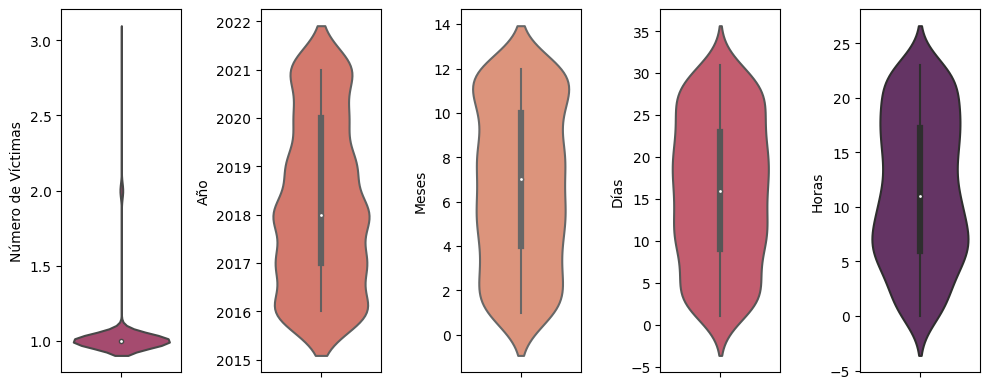

In [380]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 4))

# Crear subplots para los gráficos de violín
plt.subplot(1, 5, 1) 
sns.violinplot(data=df, y='Num víctimas', color = "#b43c6c")
plt.ylabel('Número de Víctimas')

plt.subplot(1, 5, 2) 
sns.violinplot(data=df, y='Año', color = "#e46c5c")
plt.ylabel('Año')

plt.subplot(1, 5, 3) 
sns.violinplot(data=df, y='Mes', color = "#ec8c6c")
plt.ylabel('Meses')

plt.subplot(1, 5, 4) 
sns.violinplot(data=df, y='Día', color = "#d44c64")
plt.ylabel('Días')

plt.subplot(1, 5, 5) 
sns.violinplot(data=df, y='Hora', color = "#6c2c6c")
plt.ylabel('Horas')

# Ajustar espaciado entre subplots
plt.tight_layout()

plt.show()


Cada uno de los gráficos que observamos arriba, nos muestran una distribución de las ocurrencias según la variable que estamos analizando. 

Para ninguno de los casos se encuentran outliers.

Si bien la primer gráfica podría sugerir un comportamiento extraño, esto se debe a que casi el 100% de los siniestros tienen una sola victima, concentrando casi todos los casos en la parte inferior del gráfico. Sin embargo, no consideramos como outliers valores que sean diferentes ya que el rango del gráfico se ajusta entre 1 y 3, valores coherentes para la cantidad de victimas de un siniestro vial. 

En conclusión, el data set no presenta valores anomalos que nos procupen para los análisis posteriores. 

<p>



</p>

## 6. Gráficos (variables cuantitativas)

### 6.1 Correlación de variables

Para identificar la relación entre las variables, crearemos una matriz de correlación. 

In [381]:
# Establecemos cuales son las variables que queremos analizar
variables_numericas = ['Num víctimas', 'Año', 'Mes', 'Día', 'Hora', ]

# Creamos la matriz de correlación
correlation_matrix = df[variables_numericas].corr()

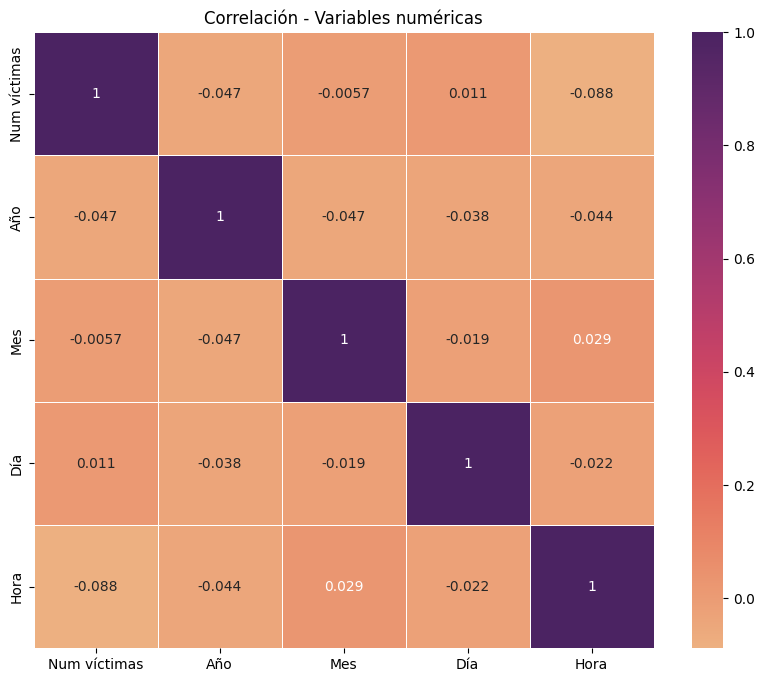

In [382]:
# Graficamos la matriz generada
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='flare', linewidths=0.5)
plt.title('Correlación - Variables numéricas')
plt.show()

El análisis revela que la mayoría de los coeficientes de correlación se encuentran cercanos a cero, indicando una correlación débil o nula entre las variables.

Esto tiene sentido ya que, el año, mes, día y hora en la que ocurre el siniestro no esta ligada a la gravedad del incidente y a la cantidad de victimas resultantes.



<p>



</p>

### 6.2 Distribución de variables

Mediante la utlización de los siguientes gráficos y estadísticas, buscamos entender en profundidad la información de cada variable.

<p>



</p>

**Num victimas**

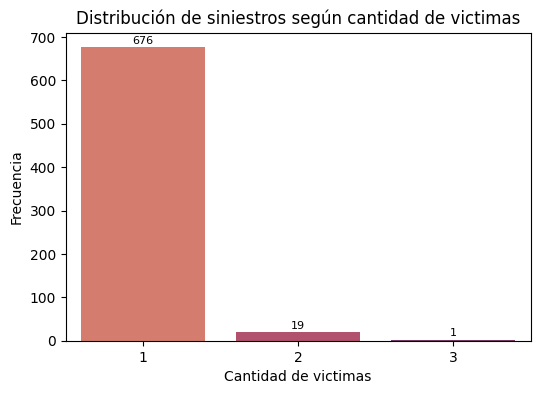

In [383]:
plt.figure(figsize=(6, 4))

graf = sns.countplot(df, x='Num víctimas', palette="flare")

plt.xlabel('Cantidad de victimas')
plt.ylabel('Frecuencia')
plt.title('Distribución de siniestros según cantidad de victimas')

for p in graf.patches:
    graf.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()



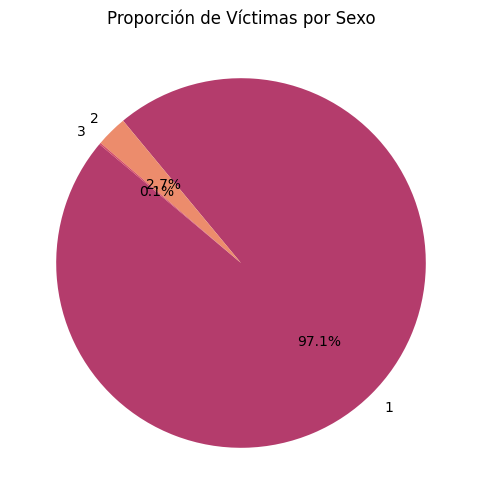

In [384]:
proporcion = df['Num víctimas'].value_counts(normalize=True) * 100

etiquetas = proporcion.index
tamaño = proporcion.values

plt.figure(figsize=(6, 6))
plt.title('Proporción de Víctimas por Sexo')

plt.pie(tamaño, labels=etiquetas, autopct='%1.1f%%', startangle=140, colors=['#b43c6c', '#ec8c6c', '#d44c64'])

plt.show()  # Muestra el gráfico de torta

El gráfico nos revela que en su gran mayoría (el 97% de los casos), los siniestros resultan con una sola víctima fatal siendo notablemente menor la cantidad de hechos donde se presentan 2 o 3 homicidios.

<p>



</p>

**Año**

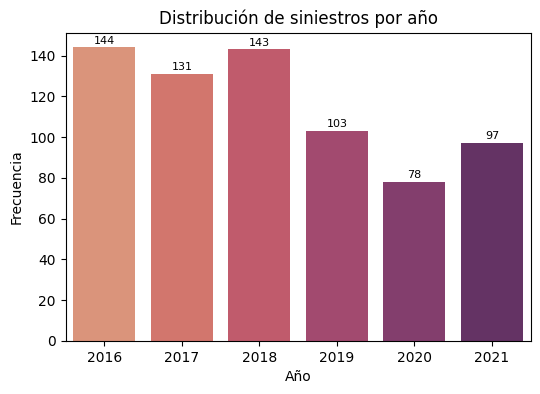

In [385]:
plt.figure(figsize=(6, 4)) 

graf = sns.countplot(df, x='Año', palette="flare")

for p in graf.patches:
    graf.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Distribución de siniestros por año')

plt.show()

El año con mayor cantidad de siniestros fue el 2016, con valores similares a los ocurridos en los años 2017 y 2018. 

Se observa una importante baja de siniestros en a partir del año 2019 siendo aún menor en el 2020. 

Está directamente relacionado con la pandemia que inició en 2019. 

Debido al lockdown y a la suspensión de muchas tareas cotidianas, las calles se vieron menos transitadas y esto tuvo un impacto significativo en la cantidad de accidentes viales. 


<p>



</p>

**Mes**


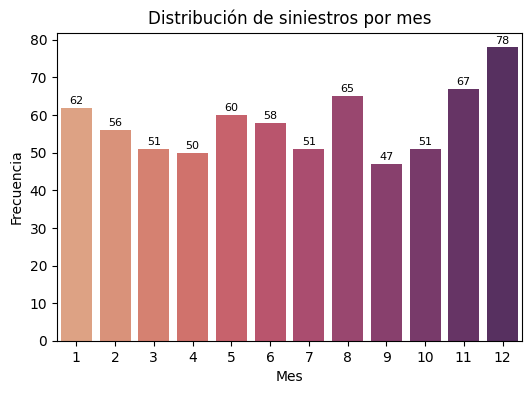

In [386]:
plt.figure(figsize=(6, 4)) 

graf = sns.countplot(df, x='Mes', palette="flare")

for p in graf.patches:
    graf.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.title('Distribución de siniestros por mes')

plt.show()

El mes con mayor cantidad de siniestros es diciembre. 

Los otros meses, si bien no estan tan alejados, parecen mantener un promedio de entre 50 y 60 siniestros por mes. 

En primera instancia, podríamos relacionar este comportamiento a las fiestas de fin de año donde aumenta notablemente el tráfico y la consgestión. 





<p>



</p>

**Día**

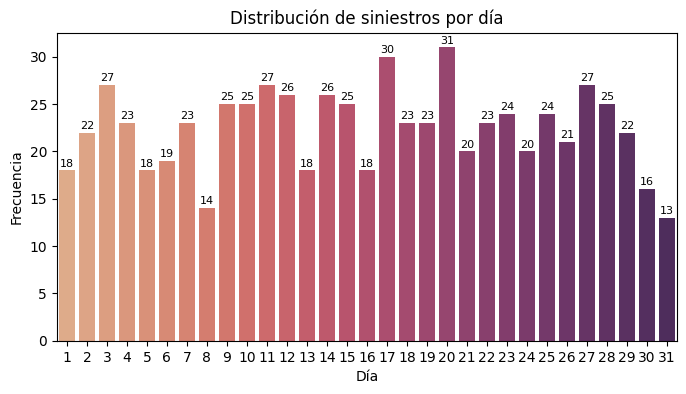

In [387]:
plt.figure(figsize=(8, 4)) 

graf = sns.countplot(df, x='Día', palette="flare")

for p in graf.patches:
    graf.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Día')
plt.ylabel('Frecuencia')
plt.title('Distribución de siniestros por día')

plt.show()

Si bien el gráfico muestra una distribución diaria, no es del todo claro ya que lo que nos interesa es saber que dia de la semana es el que es mas frecuente que ocurran accidentes viales. 

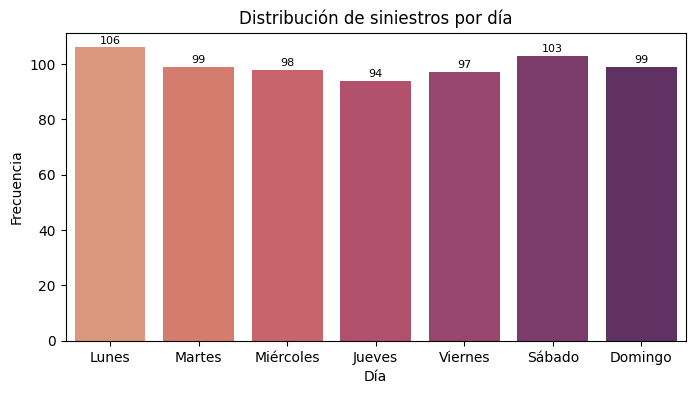

In [388]:
# Creamos un orden personalizado para los días de la semana
orden_dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

plt.figure(figsize=(8, 4))
graf = sns.countplot(data=df, x='Día semana', palette="flare", order=orden_dias_semana)

# Anotar las frecuencias en las barras
for p in graf.patches:
    graf.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Día')
plt.ylabel('Frecuencia')
plt.title('Distribución de siniestros por día')

plt.show()


Podemos concluir que, si bien existe una leve diferencia entre los dias semanales en cuanto a la cantidad de siniestros, no es tan amplia para considerar a un día mas propenso a accidentes que otro. 

<p>



</p>

**Hora**

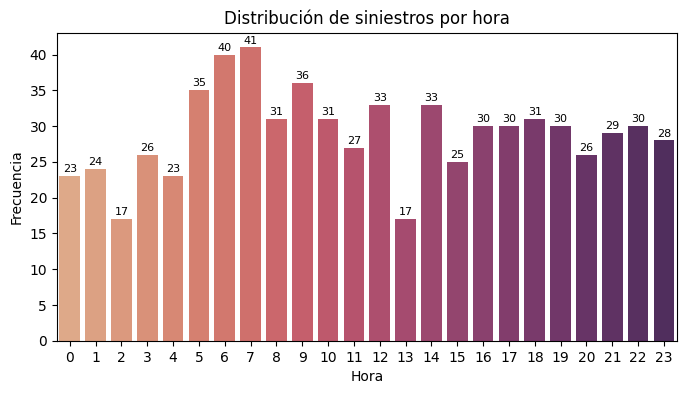

In [389]:
plt.figure(figsize=(8, 4))

graf = sns.countplot(df, x='Hora', palette="flare")

for p in graf.patches:
    graf.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Hora')
plt.ylabel('Frecuencia')
plt.title('Distribución de siniestros por hora')

plt.show()

Observamos en este gráfico que existe un pico de siniestros en las primeras horas de la mañana. 

Podemos relacionar este comportamiento con los horarios laborales y como esto condiciona al tráfico a y su congestión. 

Es evidente que entre las 6 y las 7 de la mañana es cuando más tráfico hay lo que genera un crecimiento en los siniestros viales, con un leve decrecimiento hacia la hora de la siesta, donde las personas suelen estar trabajando. 

Es importante aclarar que en la gran mayoria de CABA, los comercios hacen horario continuo, de 7-8 a 14-16 hs. 

Luego de las 13, comienza el crecimiento nuevamente, el cual podría a estar asociado a que las personas regresan del trabajo congestionando las calles. 

Durante la madrugada los valores llegan casi al mínimo y comienzan a crecer cuando nos acercamos al horario en el que las personas van al trabajo. 

Durante las horas de la noche, se observa estabilidad. 

<p>



</p>

## 7. Gráficos (variables cualitativas)

### 7.1 Distribución de variables

Analizaremos ahora las variables categóricas. 

Tendremos en cuenta para el análisis las siguientes:'Tipo de calle', 'Participantes', 'Víctima', 'Acusado' y 'Comuna'

<p>



</p>

**Tipo de calle**

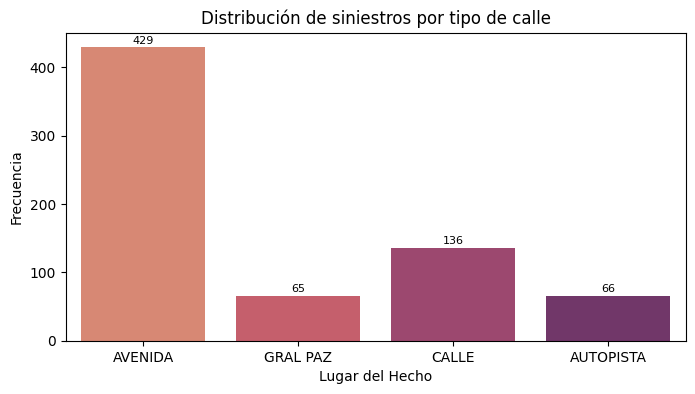

In [390]:
plt.figure(figsize=(8, 4))

graf = sns.countplot(df, x='Tipo de calle', palette="flare")

for p in graf.patches:
    graf.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Lugar del Hecho')
plt.ylabel('Frecuencia')
plt.title('Distribución de siniestros por tipo de calle')

plt.show()


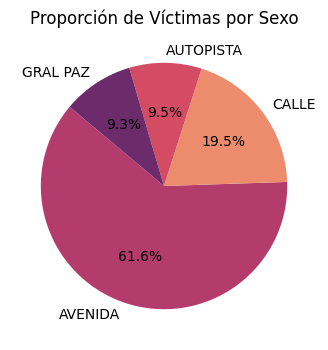

In [391]:
proporcion = df['Tipo de calle'].value_counts(normalize=True) * 100

etiquetas = proporcion.index
tamaño = proporcion.values

plt.figure(figsize=(10, 4))
plt.title('Proporción de Víctimas por Sexo')

plt.pie(tamaño, labels=etiquetas, autopct='%1.1f%%', startangle=140, colors=['#b43c6c', '#ec8c6c', '#d44c64','#6c2c6c' ])

plt.show()  # Muestra el gráfico de torta

Se observa una amplia diferencia de siniestros ocurridos en avenidas sobre los otros lugares posibles de hecho. 

Algunas posibles razones por las cuales en una avenida pueden ocurrir más accidentes que en una calle o autopistas incluyen:

+ **Mayor volumen de tráfico**: Las avenidas suelen tener un mayor flujo de vehículos en comparación con las calles, lo que aumenta la probabilidad de que ocurran accidentes debido a la mayor interacción entre vehículos. Si bien en las autopistas el volumen es muy grande, no existe el factor 'peatón' que muchas veces es la víctima de los siniestros viales. 


+ **Mayor velocidad promedio**: En general, los conductores tienden a circular a velocidades más altas en avenidas que en calles, lo que puede aumentar la gravedad de los accidentes cuando ocurren.


+ **Intersecciones complejas**: Las avenidas tienen intersecciones más grandes y complejas con múltiples carriles, giros a la izquierda y derecha, semáforos, lo que puede aumentar la probabilidad de colisiones.


+ **Concentración de negocios y actividades**: Las avenidas están rodeadas de zonas comerciales o de mayor actividad, lo que puede aumentar la cantidad de vehículos que ingresan y salen de estacionamientos, lo que a su vez aumenta la probabilidad de accidentes.

+ **Mayor cantidad de carriles**: Las avenidas suelen tener más carriles que las calles, lo que significa que hay más oportunidades para que los vehículos cambien de carril, adelanten o realicen otras maniobras que pueden aumentar el riesgo de colisiones.


<p>



</p>

**Participantes**

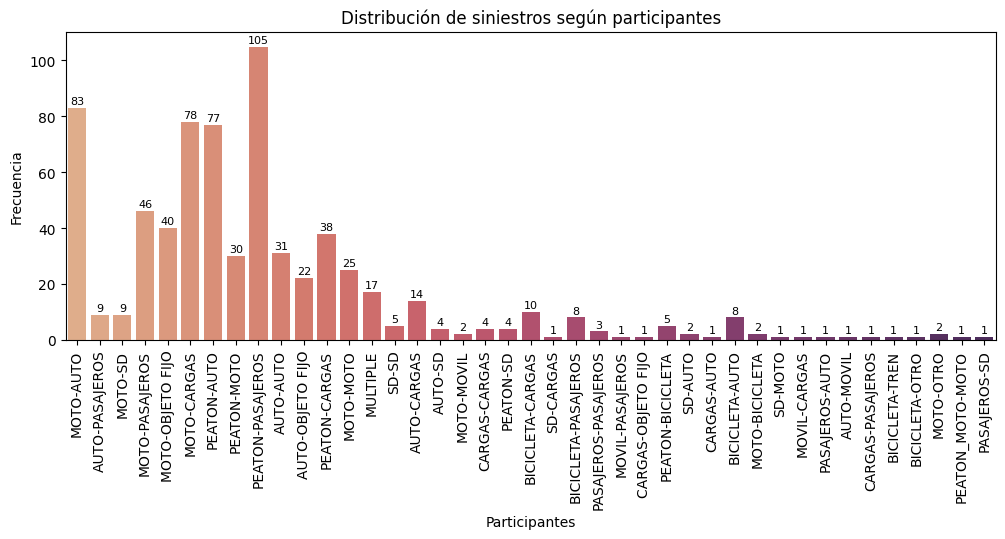

In [392]:
plt.figure(figsize=(12, 4))

graf = sns.countplot(df, x='Participantes', palette="flare")

plt.xticks(rotation=90)

for p in graf.patches:
    graf.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Participantes')
plt.ylabel('Frecuencia')
plt.title('Distribución de siniestros según participantes')

plt.show()


El gráfico nos muestra que los siniestros viales con mas ocurren mas a menudo entre **Peatones** y **Pasajeros** (en este caso se interpreta como vehiculos de transporte público, por ejemplo, un colectivo). 

En la Ciudad Autónoma de Buenos Aires, existen actualmente 137 líneas de colectivos, de las cuales 33 inician y terminan su recorrido en CABA. 

A partir de este dato podemos llegar a algunas suposiciones:

+ **Mayor densidad de tráfico**: La presencia de una gran cantidad de líneas de colectivos en una ciudad puede aumentar la densidad de tráfico en las calles y avenidas. Cuanto más tráfico haya en las calles, mayor será la probabilidad de que ocurran accidentes debido a la interacción entre vehículos y peatones. 

+ **Paradas de colectivo**: Las paradas de colectivo pueden ser lugares de riesgo para los peatones. La cantidad de paradas de colectivo en la ciudad puede influir en la cantidad de accidentes, especialmente si no se toman las medidas adecuadas para garantizar la seguridad de los peatones al cruzar la calle cerca de las paradas de autobús.

+ **Comportamiento de los conductores**: El comportamiento de los conductores de colectivos en las calles puede influir en la seguridad vial. Un aumento en el número de colectivos en circulación puede estar relacionado con un mayor riesgo si los conductores no respetan las normas de tráfico y seguridad.

+ **Infraestructura vial**: La infraestructura vial, como carriles exclusivos para colectivos, señalización adecuada y cruces peatonales seguros, puede influir en la seguridad en las áreas donde operan las líneas de colectivos. Una infraestructura vial adecuada puede reducir el riesgo de accidentes.

Se identifica también que existen muchos siniestros viales entre **MOTO-AUTO**, **MOTO-CARGAS** y **PEATON-AUTO**. Las motos en la ciudad de Buenos Aires y en general en la ciudadades grande de Argentina, son de uso común. Mucha gente decide utilizar este vehiculo por su facilidad de uso y sobretodo por la superpoblación de autos y la escases de estacionamientos que esto produce. Al haber tantas motos en circulacíon en una ciudad con tantos colectivos y autos, crece notablemente el reisgo de accidentes. 

<p>



</p>

**Víctima**

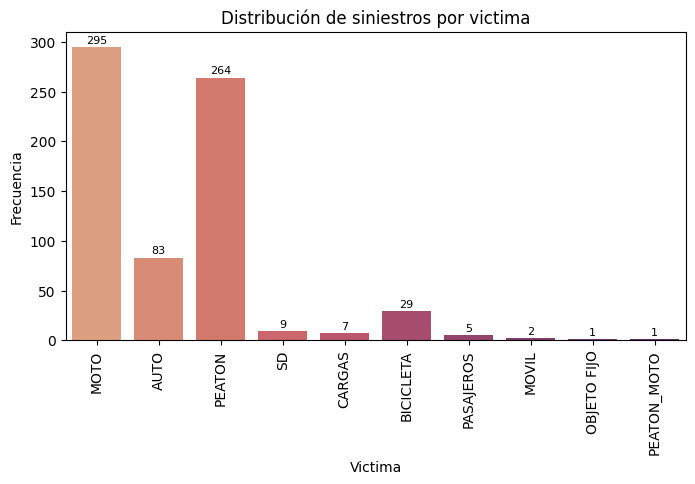

In [393]:
plt.figure(figsize=(8, 4))

graf = sns.countplot(df, x='Victima', palette="flare")

for p in graf.patches:
    graf.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=90)

plt.xlabel('Victima')
plt.ylabel('Frecuencia')
plt.title('Distribución de siniestros por victima')

plt.show()


En este gráfico observamos que las víctimas de estos siniestros son en su gran mayoría **motos** y **peatones**.

Volviendo a lo que mencionamos antes, la gran cantidad de motos, autos y colectivos generan un escenario en donde los siniestros y accidentes son muy comunes. Si nos guiamos por lo que indica el gráfico, las victimas son generalmente las motos y los peatones. 

Algunos factores que explican esto pueden ser:

+ **Menos protección**: Tanto los peatones como los conductores de motos están menos protegidos en comparación con los ocupantes de autos y colectivos. Los automóviles están equipados con carrocerías y sistemas de seguridad diseñados para proteger a los ocupantes en caso de colisión, mientras que los peatones y los motociclistas están expuestos directamente al impacto.

+ **Mayor vulnerabilidad**: Los peatones son completamente vulnerables al tráfico, ya que no tienen ninguna barrera física para protegerlos en caso de colisión. Los conductores de motos, aunque tienen vehículos, están menos protegidos que los ocupantes de automóviles en caso de accidente.

+ **Tamaño y visibilidad**: Las motos son más pequeñas que los automóviles, lo que puede dificultar que los conductores de automóviles las vean fácilmente en el tráfico. Esto puede dar lugar a accidentes debido a la falta de visibilidad.

<p>



</p>

**Acusado**

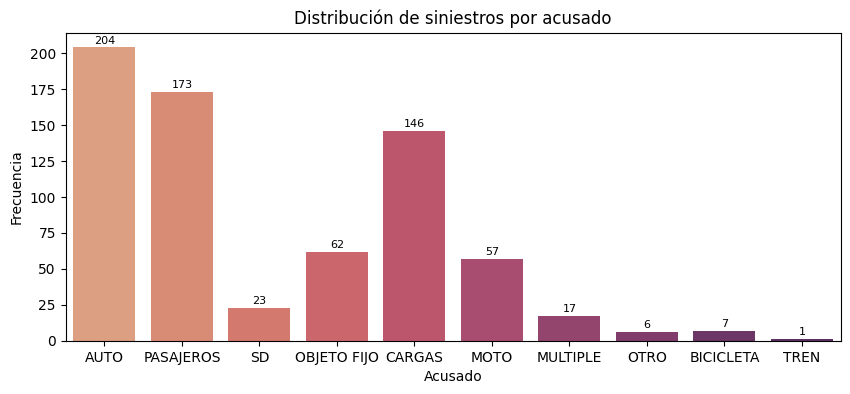

In [394]:
plt.figure(figsize=(10, 4))

graf = sns.countplot(df, x='Acusado', palette="flare")

for p in graf.patches:
    graf.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Acusado')
plt.ylabel('Frecuencia')
plt.title('Distribución de siniestros por acusado')

plt.show()


Si analizamos los acusados en los siniestros viales, los **Autos** y **Colectivos (PASAJEROS)** son los que tienen mayor responsabilidad. 

Esto puede estar directamente relacionado con la cantidad de vehículos de estas características que circulan en las calles y su por tener un porte mayor que los demás. 

<p>



</p>

**Comuna**

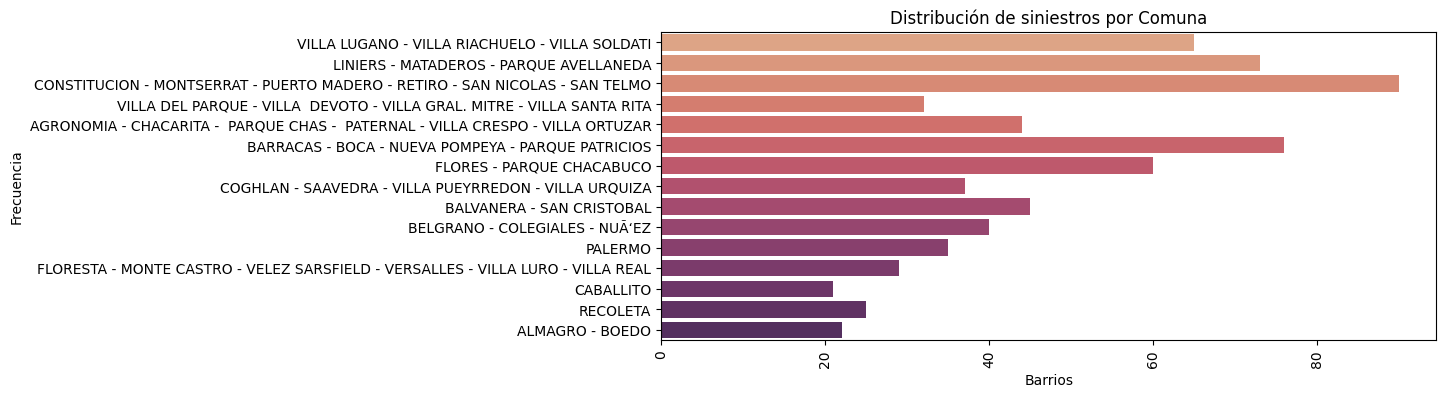

In [395]:
plt.figure(figsize=(10, 4))

sns.countplot(df, y='Barrios', palette="flare")


plt.xticks(rotation=90)

plt.xlabel('Barrios')
plt.ylabel('Frecuencia')
plt.title('Distribución de siniestros por Comuna')

plt.show()


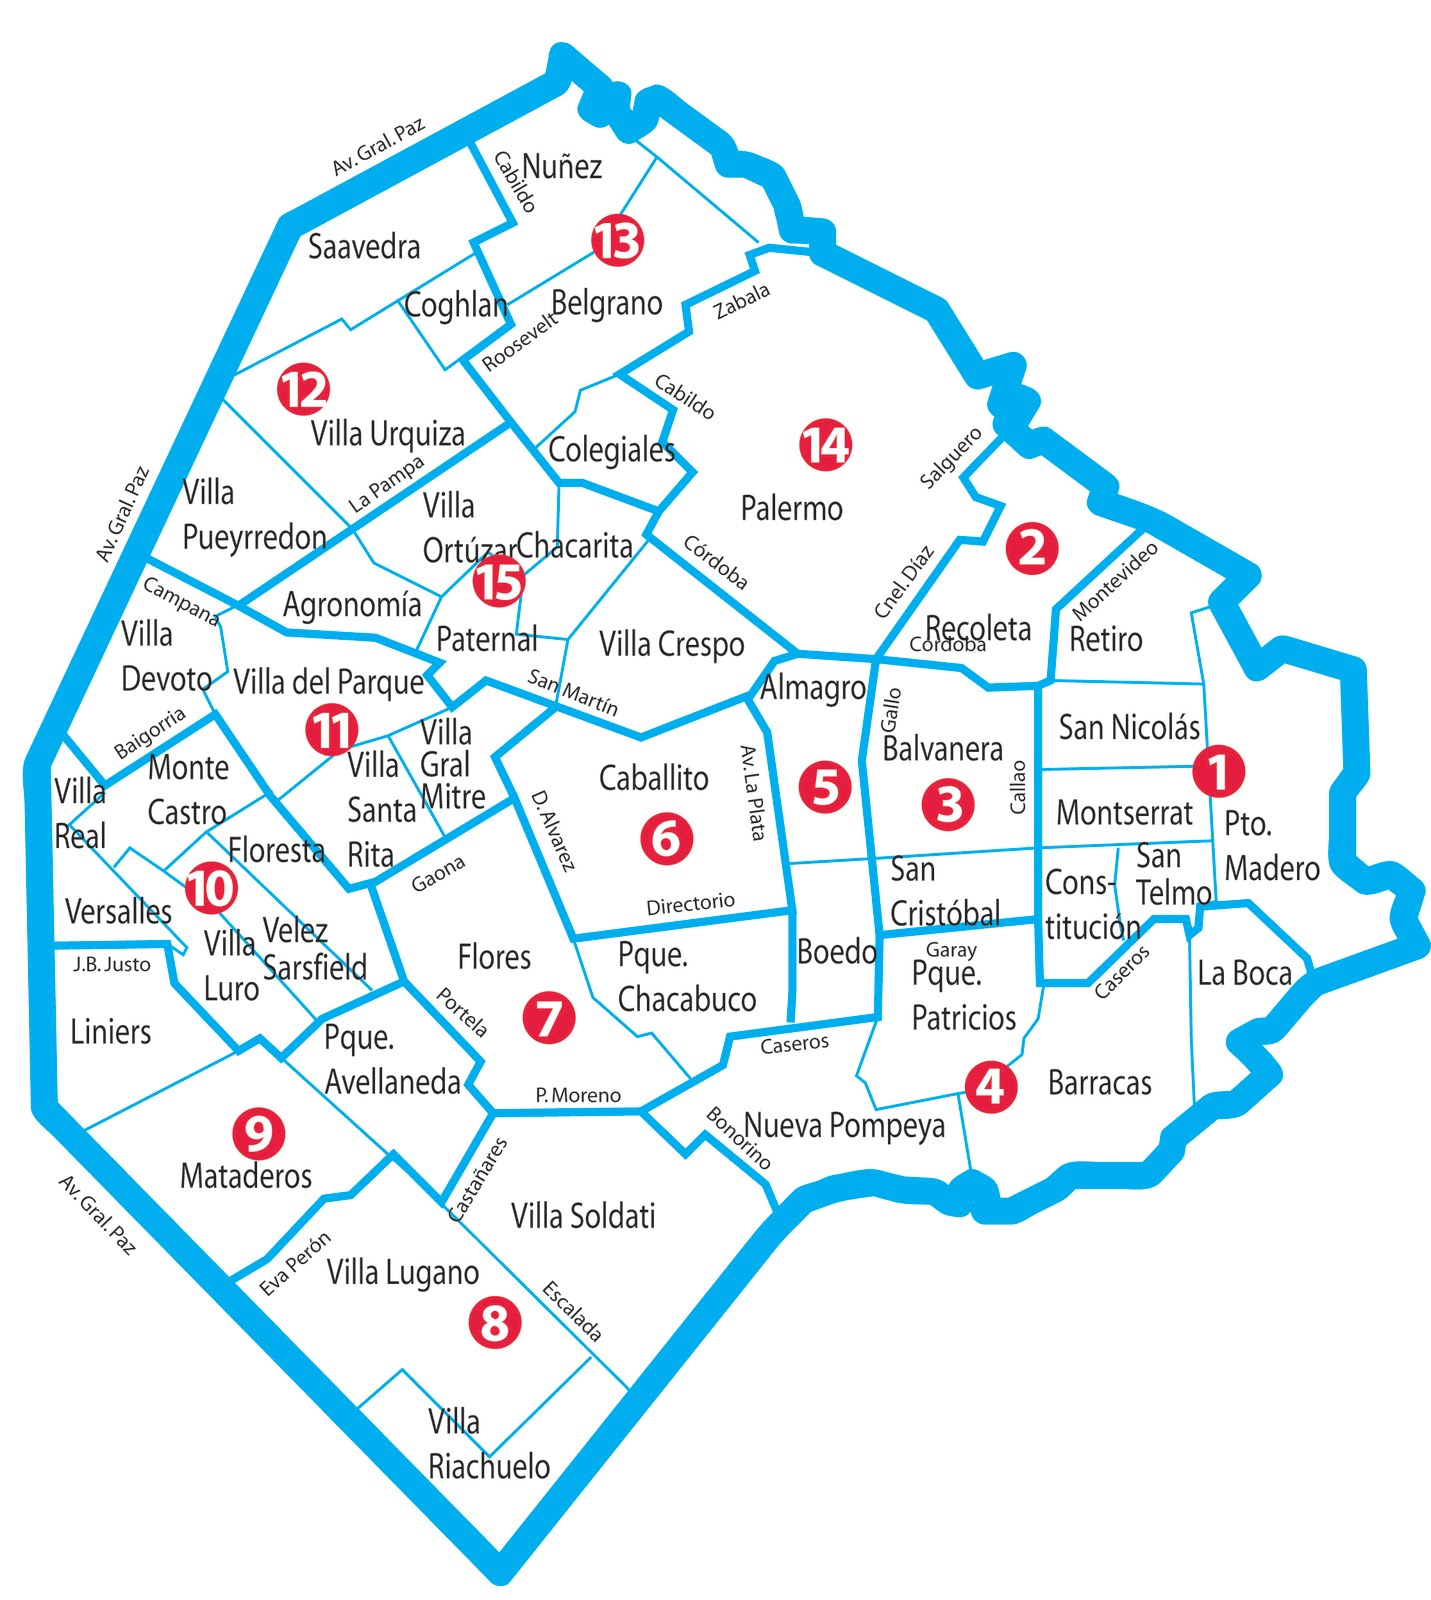

In [396]:
ruta_imagen = 'data/comunas.jpg'
Image(filename=ruta_imagen,width=400, height=400)

<p>



</p>

Se observa en este gráfico, la frecuencia de siniestros viales en cada una de las 15 comunas de CABA. 

Algunas de las 15 coumnas estan formadas por varios barrios y otras por solo uno. 

Si bien parecería una comparación dispareja, la superficie cubierta por las comunas es suficientemente similar lo que hace que la interpretación tenga sentido. 

Las comunas **1, 4, 7, 8** y **9** son las que tienen un mayor volumen de sinestros viales. 

<p>



</p>

### 8. Creación CSV

El último paso de nuestro análisis exploratorio es crear un archivo CSV. 

El objetivo es poder leer el archivo ya trabajado, en una plataforma de visualización. 

In [397]:
df.to_csv('Hechos.csv', index=False)